2025-07-27 11:29:53,610 - INFO - 📥 Loading air quality data from: C:\Users\cron\Desktop\air_quality_sample_data_150.csv
2025-07-27 11:29:53,620 - INFO - ✅ Loaded 150 records.
2025-07-27 11:29:53,622 - INFO - 🧹 Starting data cleaning...
2025-07-27 11:29:53,631 - INFO - ✅ Cleaned data: 150 valid records remaining.
2025-07-27 11:29:53,633 - INFO - 📊 Calculating stats using NumPy...


📊 Pollution Statistics:


,parameter,avg,max,min
0,co,117.988824,249.07,18.65
1,no2,144.754545,247.49,15.05
2,pm10,118.180303,244.29,15.68
3,pm25,123.049063,244.72,10.85
4,so2,109.808333,225.91,10.78


2025-07-27 11:29:53,655 - INFO - 📈 Plotting average pollution level by parameter...


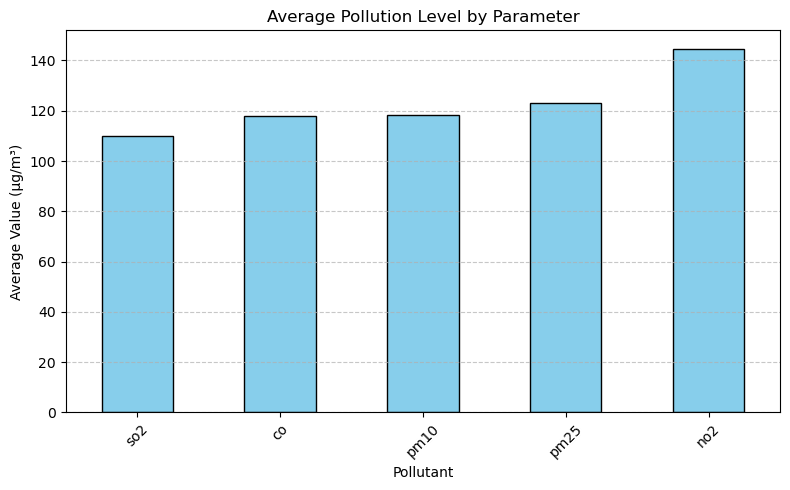

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from IPython.display import display


logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Air Quality Analyzer Class
class AirQualityAnalyzer:
    def __init__(self, file_path, threshold):
        self.file_path = file_path
        self.threshold = threshold
        self.data = None

    def load_from_csv(self):
        logging.info(f"📥 Loading air quality data from: {self.file_path}")
        try:
            self.data = pd.read_csv(self.file_path, parse_dates=['date'], encoding='utf-8')
            logging.info(f"✅ Loaded {len(self.data)} records.")
        except Exception as e:
            logging.error(f"❌ Failed to load data: {e}")

    def clean_data(self):
        if self.data is None:
            logging.error("❌ No data loaded to clean.")
            return

        logging.info("🧹 Starting data cleaning...")
        
        # Drop rows where essential fields are missing
        self.data.dropna(subset=["parameter", "value", "location", "date"], inplace=True)

        # Convert 'value' to numeric (force errors to NaN)
        self.data['value'] = pd.to_numeric(self.data['value'], errors='coerce')

        # Drop rows with NaN values in 'value' column (after conversion)
        self.data.dropna(subset=["value"], inplace=True)

        # Remove rows where value is 0 or negative
        self.data = self.data[self.data['value'] > 0]

        # Ensure 'date' is datetime
        self.data['date'] = pd.to_datetime(self.data['date'], errors='coerce')
        self.data.dropna(subset=["date"], inplace=True)

        logging.info(f"✅ Cleaned data: {len(self.data)} valid records remaining.")

    def calculate_stats(self):
        if self.data is None or self.data.empty:
            logging.warning("⚠️ No data to calculate statistics.")
            return pd.DataFrame()

        logging.info("📊 Calculating stats using NumPy...")
        stats = self.data.groupby('parameter')['value'].agg(['mean', 'max', 'min']).reset_index()
        stats.rename(columns={'mean': 'avg'}, inplace=True)
        return stats

    def plot_avg_pollution_bar_chart(self):
        if self.data is None or self.data.empty:
            logging.warning("⚠️ No data to plot.")
            return
        logging.info("📈 Plotting average pollution level by parameter...")

        avg_values = self.data.groupby("parameter")["value"].mean().sort_values()

        plt.figure(figsize=(8, 5))
        avg_values.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title("Average Pollution Level by Parameter")
        plt.xlabel("Pollutant")
        plt.ylabel("Average Value (µg/m³)")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


# 🧪 Usage
args = {
    "file_path": r"C:\Users\cron\Desktop\air_quality_sample_data_150.csv",
    "threshold": 50
}

analyzer = AirQualityAnalyzer(args["file_path"], args["threshold"])
analyzer.load_from_csv()
analyzer.clean_data()

print("📊 Pollution Statistics:")
stats_df = analyzer.calculate_stats()
display(stats_df)

# Simple bar chart
analyzer.plot_avg_pollution_bar_chart()
